# <center> Final Project - Stage 3 (Supervised Learning) </center>

**Kelompok : "ASKLEPIOS"** <br>
**Nama Anggota :** <br>
        - Awalsyah Rinanto Putra <br>
        - Fathah Oscar <br>
        - M Rizky Septiansyah <br>
        - Hermawan Febrianto <br>
        - Devi Puji Ayuningsih <br>
        - Anggita Citanegara Lubis

In [2]:
#import library 

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# 1. Data Preparation

## 1A. Load Data

In [1]:
import pandas as pd

df =pd.read_csv("(clean)ecommerceshippingdata.csv")
df.sample(5)

,Calls,Rating,Cost,Purchases,Importance,Gender,Discount,Weight (gram),Late,log_discount,...,Norm_Purchases,Norm_Calls,Warehouse_A,Warehouse_B,Warehouse_C,Warehouse_D,Warehouse_F,Shipment_Flight,Shipment_Road,Shipment_Ship
241,2,2,127,3,0,1,13,1128,1,2.564949,...,0.292481,0.0,0,0,1,0,0,0,1,0
7836,4,3,163,3,0,0,10,5002,1,2.302585,...,0.292481,0.4,0,1,0,0,0,0,0,1
3002,3,4,170,3,0,1,5,4716,1,1.609438,...,0.292481,0.2,0,0,0,0,1,0,0,1
7955,7,4,290,4,0,0,10,1886,1,2.302585,...,0.500000,1.0,0,0,1,0,0,0,0,1
1784,6,4,194,3,0,1,10,2554,1,2.302585,...,0.292481,0.8,0,0,0,0,1,1,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10642 entries, 0 to 10641
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Calls            10642 non-null  int64  
 1   Rating           10642 non-null  int64  
 2   Cost             10642 non-null  int64  
 3   Purchases        10642 non-null  int64  
 4   Importance       10642 non-null  int64  
 5   Gender           10642 non-null  int64  
 6   Discount         10642 non-null  int64  
 7   Weight (gram)    10642 non-null  int64  
 8   Late             10642 non-null  int64  
 9   log_discount     10642 non-null  float64
 10  log_purchases    10642 non-null  float64
 11  Std_Cost         10642 non-null  float64
 12  Std_Disc         10642 non-null  float64
 13  Std_Weight       10642 non-null  float64
 14  Std_Purchases    10642 non-null  float64
 15  Std_Calls        10642 non-null  float64
 16  Norm_Cost        10642 non-null  float64
 17  Norm_Disc   

<b> Bagi dataset jadi 2, yaitu dataset normalisasi dan dataset standarisasi </b>

In [6]:
# dfS hapus kolom normalisasi (modeling standarisasi)
dfs = df.drop(columns=['Norm_Cost', 'Norm_Disc','Norm_Weight','Norm_Purchases','Norm_Calls'])

In [7]:
dfs.shape

(10642, 24)

In [8]:
# dfn hapus kolom standarisasi (modeling normalisasi)
dfn = df.drop(columns=['Std_Cost', 'Std_Disc','Std_Weight','Std_Purchases','Std_Calls'])

In [9]:
dfn.shape

(10642, 24)

## 1B. Cek Class Imbalance

In [10]:
# Class imbalance

df.Late.value_counts(normalize=True)

1    0.590303
0    0.409697
Name: Late, dtype: float64

<b> Target dataset sudah lumayan balance karena minority class > 40 % </b>

## 1C. Feature Importance & Target

### Dataset Standardization

In [11]:
# hapus Late (target) + 'Calls', 'Cost', 'Purchases', 'Discount', 'Weight (gram), 'log_purchase', 'log_discount' pada dfs

Xs = dfs.drop(columns=[ 'Late', 'Calls', 'Cost', 'Purchases', 'Discount', 'Weight (gram)',
                     'log_purchases', 'log_discount']) #drop feature yang sudah ditransformasi
ys = dfs['Late'] #target

### Dataset Normalization

In [12]:
# hapus Late (target) + 'Calls', 'Cost', 'Purchases', 'Discount', 'Weight (gram), 'log_purchase', 'log_discount' pada dfs

Xn = dfn.drop(columns=[ 'Late', 'Calls', 'Cost', 'Purchases', 'Discount', 'Weight (gram)',
                     'log_purchases', 'log_discount']) #drop feature yang tidak signifikan
yn = dfn['Late'] #target

## 1D. Split Train and Test Dataset

### Dataset Standardization

In [13]:
# split train and test

from sklearn.model_selection import train_test_split
Xs_train, Xs_test, ys_train, ys_test = train_test_split(Xs, ys, test_size=0.3, random_state=42)

### Dataset Normalization

In [14]:
# split train and test
from sklearn.model_selection import train_test_split
Xn_train, Xn_test, yn_train, yn_test = train_test_split(Xn, yn, test_size=0.3, random_state=42)

## 1D. Define Fungsi Metode Evaluasi

### Dataset Standardization

In [15]:
# pembuatan fungsi untuk mengeluarkan output skor evaluasi model

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate

def eval_classification_std(model):
    ys_pred = model.predict(Xs_test)
    ys_pred_train = model.predict(Xs_train)
    ys_pred_proba = model.predict_proba(Xs_test)
    ys_pred_proba_train = model.predict_proba(Xs_train)
    
    
    print("Accuracy (Train Set): %.2f" % accuracy_score(ys_train, ys_pred_train))
    print("Accuracy (Test Set): %.2f" % accuracy_score(ys_test, ys_pred))
    print("Precision (Train Set): %.2f" % precision_score(ys_train, ys_pred_train))
    print("Precision (Test Set): %.2f" % precision_score(ys_test, ys_pred))
    print("Recall (Train Set): %.2f" % recall_score(ys_train, ys_pred_train))
    print("Recall (Test Set): %.2f" % recall_score(ys_test, ys_pred))
    print("F1-Score (Train Set): %.2f" % f1_score(ys_train, ys_pred_train))
    print("F1-Score (Test Set): %.2f" % f1_score(ys_test, ys_pred))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(ys_train, ys_pred_proba_train[:, 1]))
    print("roc_auc (test-proba): %.2f" % roc_auc_score(ys_test, ys_pred_proba[:, 1]))

    score = cross_validate(model, Xs, ys, cv=5, scoring='roc_auc', return_train_score=True)
    print('roc_auc (crossval train): '+ str(score['train_score'].mean()))
    print('roc_auc (crossval test): '+ str(score['test_score'].mean()))

In [16]:
# pembuatan fungsi untuk melihat feature importance pada model decision tree

def show_feature_importance_std(model):
    feat_importances = pd.Series(model.feature_importances_, index=Xs.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

In [17]:
# pembuatan fungsi untuk melihat hyperparameter yang telah dituning

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

### Dataset Normalization

In [18]:
# pembuatan fungsi untuk mengeluarkan output skor evaluasi model

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate

def eval_classification_norm(model):
    yn_pred = model.predict(Xn_test)
    yn_pred_train = model.predict(Xn_train)
    yn_pred_proba = model.predict_proba(Xn_test)
    yn_pred_proba_train = model.predict_proba(Xn_train)
    
    
    print("Accuracy (Train Set): %.2f" % accuracy_score(yn_train, yn_pred_train))
    print("Accuracy (Test Set): %.2f" % accuracy_score(yn_test, yn_pred))
    print("Precision (Train Set): %.2f" % precision_score(yn_train, yn_pred_train))
    print("Precision (Test Set): %.2f" % precision_score(yn_test, yn_pred))
    print("Recall (Train Set): %.2f" % recall_score(yn_train, yn_pred_train))
    print("Recall (Test Set): %.2f" % recall_score(yn_test, yn_pred))
    print("F1-Score (Train Set): %.2f" % f1_score(yn_train, yn_pred_train))
    print("F1-Score (Test Set): %.2f" % f1_score(yn_test, yn_pred))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(yn_train, yn_pred_proba_train[:, 1]))
    print("roc_auc (test-proba): %.2f" % roc_auc_score(yn_test, yn_pred_proba[:, 1]))

    score = cross_validate(model, Xn, yn, cv=5, scoring='roc_auc', return_train_score=True)
    print('roc_auc (crossval train): '+ str(score['train_score'].mean()))
    print('roc_auc (crossval test): '+ str(score['test_score'].mean()))

In [21]:
# pembuatan fungsi untuk melihat feature importance pada model decision tree

def show_feature_importance_norm(model):
    feat_importances = pd.Series(model.feature_importances_, index=Xn.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

In [20]:
# pembuatan fungsi untuk melihat hyperparameter yang telah dituning

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

# 2. Modelling

## 2A. Logistic Regression

### Fit Modelling (Data Standardization)

In [17]:
from sklearn.linear_model import LogisticRegression # import logistic regression dari sklearn
logregs = LogisticRegression() # inisiasi object dengan nama logreg
logregs.fit(Xs_train, ys_train) # fit model regression dari data train
eval_classification_std(logregs)

Accuracy (Train Set): 0.62
Accuracy (Test Set): 0.63
Precision (Train Set): 0.66
Precision (Test Set): 0.67
Recall (Train Set): 0.74
Recall (Test Set): 0.72
F1-Score (Train Set): 0.70
F1-Score (Test Set): 0.70
roc_auc (train-proba): 0.71
roc_auc (test-proba): 0.72
roc_auc (crossval train): 0.7141199070075464
roc_auc (crossval test): 0.696233287100099


nilai ROC-AUC underfitting (AUC data test lebih besar daripada data train), namun ROC-AUC pada crossval lebih besar data train daripada data test, langkah selanjutnya adalah mencoba tuning hyperparameter.

### Hyperparameter Tuning
<b>Hyperparameter yang biasa di tuning pada Logistic Regression:</b> https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
- C: nilai regularization
- penalty: menggukanan l2 norm (ridge), l1 (lasso), atau elastic net
- solver: metode bagaimana kita melakukan update pada variable di logistic regression (slope/intercept): liblinear bagus jika data sedikit; sag & saga bagus jika data besar (karena menggunakan metode sampling)

In [18]:
from sklearn.model_selection import RandomizedSearchCV

penalty = ['l1', 'l2'] # pakai lasso dan ridge
C = [float(x) for x in np.linspace(0.0001, 0.05, 100)] # buat 100 iterasi antara 0.0001 sampai 0.05
hyperparameters = dict(penalty=penalty, C=C)

logregs = LogisticRegression()
rss = RandomizedSearchCV(logregs, hyperparameters, scoring='roc_auc', random_state=42, cv=5)
rss.fit(Xs_train, ys_train)
eval_classification_std(rss)

Accuracy (Train Set): 0.62
Accuracy (Test Set): 0.63
Precision (Train Set): 0.66
Precision (Test Set): 0.67
Recall (Train Set): 0.74
Recall (Test Set): 0.73
F1-Score (Train Set): 0.70
F1-Score (Test Set): 0.70
roc_auc (train-proba): 0.71
roc_auc (test-proba): 0.72
roc_auc (crossval train): 0.7140754209517693
roc_auc (crossval test): 0.6959115443320479


Masiih sama keadannya seperti sebelum tuning hyperparameter yaitu underfitting namun pada crossval ROC-AUC data train sudah lebih besar daripada data test. Langkah selanjutnya coba melihat learning curve.

param value: 0.0001; train: 0.707848088231673; test: 0.7167929954644565
param value: 0.010199999999999999; train: 0.709955014143422; test: 0.71660819309381
param value: 0.0203; train: 0.7101031264759935; test: 0.7164759603253169
param value: 0.0304; train: 0.710149015183566; test: 0.7164136855658431
param value: 0.0405; train: 0.7101852038391313; test: 0.7163999365929722
param value: 0.0506; train: 0.7102114685953353; test: 0.7163692035947902
param value: 0.060700000000000004; train: 0.7102254217470689; test: 0.7163631378714649
param value: 0.0708; train: 0.7102298986941491; test: 0.7163590940559146
param value: 0.0809; train: 0.710232883325536; test: 0.7163514108063691
param value: 0.091; train: 0.7102379571988937; test: 0.7163449407014888
param value: 0.1011; train: 0.7102399718250797; test: 0.716333213636393
param value: 0.1112; train: 0.7102463887825614; test: 0.7163356399257232
param value: 0.1213; train: 0.7102478810982549; test: 0.7163376618334985
param value: 0.1314; train: 0.7

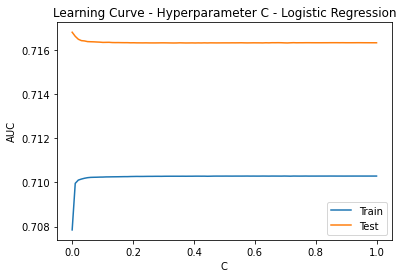

In [19]:
# Draw the learning curve

import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

def draw_learning_curve_std(param_values):
    train_scores = []
    test_scores = []

    for c in param_values:
        model = LogisticRegression(penalty='l2', C=c) #ini bisa diutak-atik
        model.fit(Xs_train, ys_train)

        # eval on train
        ys_pred_train_proba = model.predict_proba(Xs_train)
        train_auc = roc_auc_score(ys_train, ys_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        ys_pred_proba = model.predict_proba(Xs_test)
        test_auc = roc_auc_score(ys_test, ys_pred_proba[:,1])
        test_scores.append(test_auc)

        print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('C')
    plt.ylabel('AUC')
    plt.title('Learning Curve - Hyperparameter C - Logistic Regression')
    plt.legend()
    plt.show()
    

param_values = [float(x) for x in np.linspace(0.0001, 1, 100)] #ini bisa diutak atik
draw_learning_curve_std(param_values)

Terlihat ROC-AUC data test selalu di atas data train dengan keadan garis sejajar, sehingga bisa disimpulkan pada metode logistic regression, keadaan selalu underfitting.

In [20]:
show_best_hyperparameter(rss)

{'C': 0.028830303030303032, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


### Cek Feature Importance

In [77]:
# lihat feature importance lewat coef

logregs.coef_

array([[ 0.01941908,  0.15201747,  0.06637133, -0.12838992,  0.64570857,
        -0.54518458, -0.20421083, -0.15129833, -0.0635537 ,  0.07111631,
        -0.02191284,  0.01635733, -0.00204248, -0.02315807,  0.02507309,
        -0.0019504 ]])

In [28]:
# menyimpan array

ft_logregs =  np.array([ 0.01941908,  0.15201747,  0.06637133, -0.12838992,  0.64570857,
        -0.54518458, -0.20421083, -0.15129833, -0.0635537 ,  0.07111631,
        -0.02191284,  0.01635733, -0.00204248, -0.02315807,  0.02507309,
        -0.0019504 ])

In [79]:
# mapping nilai coef dengan featurenya

Xs.columns

Index(['Rating', 'Importance', 'Gender', 'Std_Cost', 'Std_Disc', 'Std_Weight',
       'Std_Purchases', 'Std_Calls', 'Warehouse_A', 'Warehouse_B',
       'Warehouse_C', 'Warehouse_D', 'Warehouse_F', 'Shipment_Flight',
       'Shipment_Road', 'Shipment_Ship'],
      dtype='object')

In [80]:
# buat dataframe baru yang berisi nama feature beserta nilai koefisiennya

dft1 = pd.DataFrame({'Feature Names' : Xs.columns, 'Importances' : ft_logregs}).sort_values(by = 'Importances')
dft1

,Feature Names,Importances
5,Std_Weight,-0.545185
6,Std_Purchases,-0.204211
7,Std_Calls,-0.151298
3,Std_Cost,-0.128390
8,Warehouse_A,-0.063554
13,Shipment_Flight,-0.023158
10,Warehouse_C,-0.021913
12,Warehouse_F,-0.002042
15,Shipment_Ship,-0.001950
11,Warehouse_D,0.016357


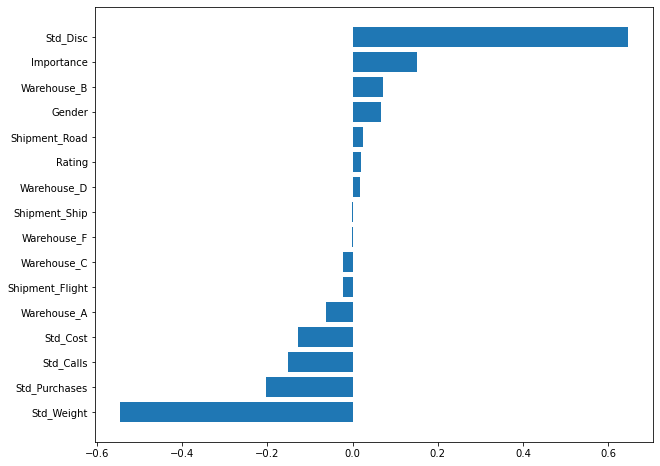

In [81]:
# membuat plot bar feature importance

fig = plt.figure(figsize = (10, 8))
plt.barh(dft1['Feature Names'], dft1['Importances'])
plt.show()

Terlihat feature Discount memiliki koefisien yang paling tinggi dengan korelasi positif, disusul Weight dengan korelasi negatif.

### Fit Modelling Data (Normalization)

In [24]:
from sklearn.linear_model import LogisticRegression # import logistic regression dari sklearn
logregn = LogisticRegression() # inisiasi object dengan nama logreg
logregn.fit(Xn_train, yn_train) # fit model regression dari data train
eval_classification_norm(logregn)

Accuracy (Train Set): 0.62
Accuracy (Test Set): 0.63
Precision (Train Set): 0.66
Precision (Test Set): 0.67
Recall (Train Set): 0.74
Recall (Test Set): 0.73
F1-Score (Train Set): 0.70
F1-Score (Test Set): 0.70
roc_auc (train-proba): 0.71
roc_auc (test-proba): 0.72
roc_auc (crossval train): 0.7141127326545897
roc_auc (crossval test): 0.6961962492889116


Dataset normalisasi memiliki nilai evaluasi yang hampir sama dengan dataset standarisasi, penulis menyimpulkan tidak ada pengaruh signifikan modeling dengan nilai standarisasi atau normalisasi.

## B. K-Nearest Neighbor

### Fit Modelling (Data Standardization)

In [25]:
# K-Nearest Neighbor

from sklearn.neighbors import KNeighborsClassifier # import knn dari sklearn
knns = KNeighborsClassifier() # inisiasi object dengan nama knn
knns.fit(Xs_train, ys_train) # fit model KNN dari data train
eval_classification_std(knns)

Accuracy (Train Set): 0.77
Accuracy (Test Set): 0.62
Precision (Train Set): 0.82
Precision (Test Set): 0.69
Recall (Train Set): 0.77
Recall (Test Set): 0.64
F1-Score (Train Set): 0.80
F1-Score (Test Set): 0.67
roc_auc (train-proba): 0.85
roc_auc (test-proba): 0.69
roc_auc (crossval train): 0.8537416157442796
roc_auc (crossval test): 0.683885467380449


Terlihat overfitting cukup besar, sehingga harus melakukan tuning hyperparameter.

In [28]:
from sklearn.model_selection import RandomizedSearchCV

n_neighbors = list(range(1,30))
p=[1,2]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
hyperparameters = dict(n_neighbors=n_neighbors, p=p, algorithm=algorithm)

knns.fit(Xs_train, ys_train)
rss = RandomizedSearchCV(knns, hyperparameters, scoring='roc_auc', random_state=1, cv=5)
rss.fit(Xs_train, ys_train)
eval_classification_std(rss)

Accuracy (Train Set): 0.69
Accuracy (Test Set): 0.65
Precision (Train Set): 0.82
Precision (Test Set): 0.77
Recall (Train Set): 0.61
Recall (Test Set): 0.58
F1-Score (Train Set): 0.70
F1-Score (Test Set): 0.66
roc_auc (train-proba): 0.78
roc_auc (test-proba): 0.72
roc_auc (crossval train): 0.7828674015776141
roc_auc (crossval test): 0.7006896913136376


Hasil terlihat jauh lebih bagus namun masih agak overfitting, cek learning curve untuk analisis lebih lanjut.

param value: 1; train: 1.0; test: 0.6215484012370841
param value: 2; train: 0.9255206875993789; test: 0.6644300322858234
param value: 3; train: 0.8898919488822182; test: 0.6877135134610531
param value: 4; train: 0.8659574436333709; test: 0.692652427583351
param value: 5; train: 0.8486357249930794; test: 0.6944966096650427
param value: 6; train: 0.8349127629553522; test: 0.7041894333482146
param value: 7; train: 0.8278542589570652; test: 0.7040003849712404
param value: 8; train: 0.82346871621304; test: 0.7048235036264938
param value: 9; train: 0.8159516609100588; test: 0.7074717984303527
param value: 10; train: 0.810431547852222; test: 0.7120083529054007
param value: 11; train: 0.8058216727515839; test: 0.7148960415898342
param value: 12; train: 0.8028705438520698; test: 0.7134898047322347
param value: 13; train: 0.7985286886499691; test: 0.7158807106763201
param value: 14; train: 0.7965357756571972; test: 0.7172980680266828
param value: 15; train: 0.7961742994883595; test: 0.7197441720

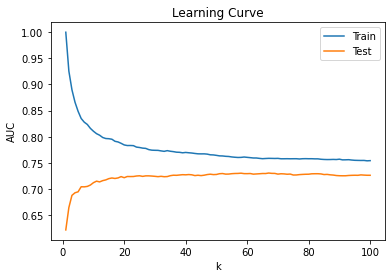

In [29]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

def draw_learning_curve_knn(param_values):
    train_scores = []
    test_scores = []

    for i in param_values:
        model = KNeighborsClassifier(n_neighbors=i)
        model.fit(Xs_train, ys_train)

        # eval on train
        ys_pred_train_proba = model.predict_proba(Xs_train)
        train_auc = roc_auc_score(ys_train, ys_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        ys_pred_proba = model.predict_proba(Xs_test)
        test_auc = roc_auc_score(ys_test, ys_pred_proba[:,1])
        test_scores.append(test_auc)

        print('param value: ' + str(i) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('k')
    plt.ylabel('AUC')
    plt.title('Learning Curve')
    plt.legend()
    plt.show()

param_values = [int(x) for x in np.linspace(1, 100, 100)]
draw_learning_curve_knn(param_values)

Pada nilai k di antara 60 dan 100 kemungkinan best fit (AUC data train sedikit lebih besar daripada data test)

param value: 60; train: 0.7604765784782708; test: 0.7292687730093105
param value: 61; train: 0.7599020742441981; test: 0.7295221180535336
param value: 62; train: 0.7592569088620421; test: 0.7283148369210065
param value: 63; train: 0.7592387399184748; test: 0.7287125461803736
param value: 64; train: 0.7585007898080809; test: 0.729083161875554
param value: 65; train: 0.7579112878012892; test: 0.7295429437036174
param value: 66; train: 0.7582979467974532; test: 0.7295025055481149
param value: 67; train: 0.7585771217557989; test: 0.7304370313217777
param value: 68; train: 0.7584746742834461; test: 0.7298148902993719
param value: 69; train: 0.7583314865926627; test: 0.7297311833174815
param value: 70; train: 0.758507729076055; test: 0.728360329845947
param value: 71; train: 0.7577543708061265; test: 0.7290732545274557
param value: 72; train: 0.7577736216785718; test: 0.7287932203006012
param value: 73; train: 0.7578781210850031; test: 0.7281415594246783
param value: 74; train: 0.75773676148

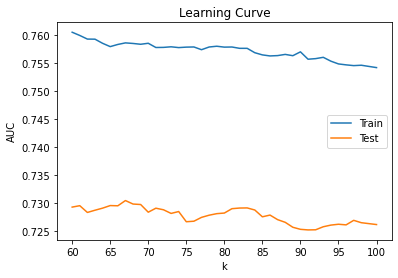

In [30]:
param_values = [int(x) for x in np.linspace(60, 100, 40)]
draw_learning_curve_knn(param_values)

Pada k = 83 sudah bestfit. Masukan nilai k = 83 pada parameter n_neighbors.

In [31]:
from sklearn.model_selection import RandomizedSearchCV

n_neighbors = [83]
p=[1,2]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
hyperparameters = dict(n_neighbors=n_neighbors, p=p, algorithm=algorithm)

knns.fit(Xs_train, ys_train)
rss = RandomizedSearchCV(knns, hyperparameters, scoring='roc_auc', random_state=1, cv=5)
rss.fit(Xs_train, ys_train)
eval_classification_std(rss)

Accuracy (Train Set): 0.68
Accuracy (Test Set): 0.66
Precision (Train Set): 0.81
Precision (Test Set): 0.78
Recall (Train Set): 0.60
Recall (Test Set): 0.58
F1-Score (Train Set): 0.69
F1-Score (Test Set): 0.66
roc_auc (train-proba): 0.76
roc_auc (test-proba): 0.72
roc_auc (crossval train): 0.7600115917437913
roc_auc (crossval test): 0.6980354862445988


In [ ]:
ROC-AUC pada data train dan data test sudah bestfit.

In [36]:
# cek parameter yang digunakan pada tuning hyperparameter

show_best_hyperparameter(rss)

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 83, 'p': 1, 'weights': 'uniform'}


### Fit Modelling (Data Normalization)

In [32]:
# KNN
from sklearn.neighbors import KNeighborsClassifier # import knn dari sklearn
knn = KNeighborsClassifier() # inisiasi object dengan nama knn
knn.fit(Xn_train, yn_train) # fit model KNN dari data train
eval_classification_norm(knn)

Accuracy (Train Set): 0.75
Accuracy (Test Set): 0.60
Precision (Train Set): 0.80
Precision (Test Set): 0.66
Recall (Train Set): 0.78
Recall (Test Set): 0.67
F1-Score (Train Set): 0.79
F1-Score (Test Set): 0.66
roc_auc (train-proba): 0.83
roc_auc (test-proba): 0.65
roc_auc (crossval train): 0.8339882708732429
roc_auc (crossval test): 0.6224328960590518


Dataset normalisasi memiliki nilai evaluasi yang hampir sama dengan dataset standarisasi, penulis menyimpulkan tidak ada pengaruh signifikan modeling dengan nilai standarisasi atau normalisasi.

## C. Decision Tree

### Fit Modelling (Data Standardization)

In [92]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier # import decision tree dari sklearn
dts = DecisionTreeClassifier() # inisiasi object dengan nama dt
dts.fit(Xs_train, ys_train) # fit model decision tree dari data train
eval_classification_std(dts)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.64
Precision (Train Set): 1.00
Precision (Test Set): 0.69
Recall (Train Set): 1.00
Recall (Test Set): 0.71
F1-Score (Train Set): 1.00
F1-Score (Test Set): 0.70
roc_auc (train-proba): 1.00
roc_auc (test-proba): 0.63
roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.6060075683924363


Overfitting, lakukan hyperparameter tuning 

### Cek Feature Importance

In [99]:
def show_feature_importance_std(model):
    feat_importances = pd.Series(model.feature_importances_, index=Xs.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')


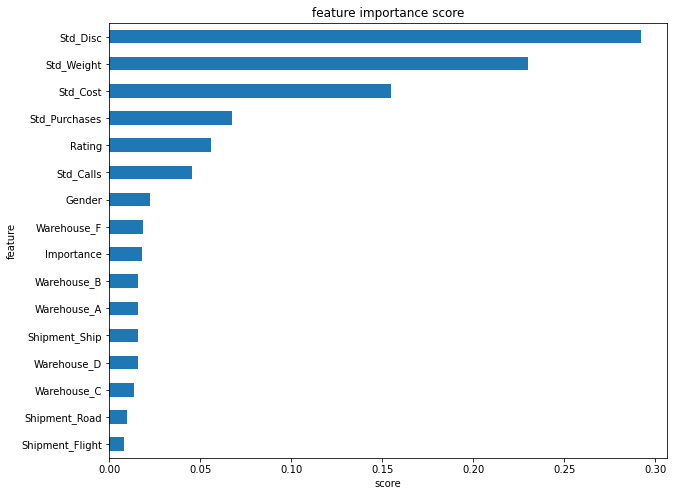

In [100]:
show_feature_importance_std(dts)

Feature diskon, weight, cost, purchases rating dan calls terlihat punya pengaruh yang cukup besar terhadap target dibanding feature lainnya.

### Hyperparameter Tuning

In [35]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform
import numpy as np

# List of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 100] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt'] # Number of features to consider at every split
criterion = ['gini','entropy']
splitter = ['best','random']

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features,
                       criterion=criterion,
                       splitter=splitter
                      )

# Inisialisasi Model
dts = DecisionTreeClassifier(random_state=42)
model = RandomizedSearchCV(dts, hyperparameters, cv=5, scoring='roc_auc', random_state = 42)
model.fit(Xs_train, ys_train)

# Predict & Evaluation
ys_pred = model.predict(Xs_test)#Check performa dari model
eval_classification_std(model)

Accuracy (Train Set): 0.70
Accuracy (Test Set): 0.65
Precision (Train Set): 0.80
Precision (Test Set): 0.75
Recall (Train Set): 0.65
Recall (Test Set): 0.61
F1-Score (Train Set): 0.72
F1-Score (Test Set): 0.67
roc_auc (train-proba): 0.79
roc_auc (test-proba): 0.72
roc_auc (crossval train): 0.826116955620767
roc_auc (crossval test): 0.7009517122799869


ROC-AUC menjadi lebih baik setelah tuning hyperparameter, namun masih agak overfitting, selanjutnya coba analisa dlearning curve untuk medapat parameter yang tepat.

param value: 1; train: 1.0; test: 0.6275787411763946
param value: 2; train: 0.9929214243556367; test: 0.6505666194349011
param value: 3; train: 0.9766772695696684; test: 0.6670176698564284
param value: 4; train: 0.9609051715454198; test: 0.6840526472434117
param value: 5; train: 0.94532938765064; test: 0.6946274270980932
param value: 6; train: 0.932275542661948; test: 0.702117988832599
param value: 7; train: 0.9220227742297973; test: 0.694922019060929
param value: 8; train: 0.9120608581262932; test: 0.7098683657162081
param value: 9; train: 0.9028494275850079; test: 0.720874418499324
param value: 10; train: 0.8946219180882838; test: 0.7218669730261327
param value: 11; train: 0.8879746962951024; test: 0.7254906361407119
param value: 12; train: 0.8807258101222281; test: 0.7246007945288793
param value: 13; train: 0.8754449152700456; test: 0.7129129544439916
param value: 14; train: 0.8725716852497278; test: 0.7170914290520649
param value: 15; train: 0.8691401053127185; test: 0.715581670516

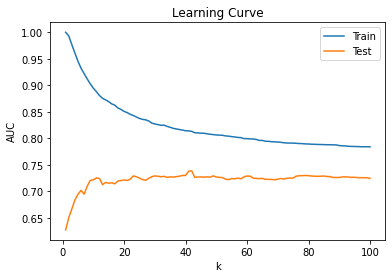

In [60]:
# Analyzing Learning Curve
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from matplotlib import pyplot as plt

def draw_learning_curve_dt(param_values):
    train_scores = []
    test_scores = []

    for i in param_values:
        model = DecisionTreeClassifier(min_samples_leaf=i) #bahan tuning
        model.fit(Xs_train, ys_train)

        # eval on train
        ys_pred_train_proba = model.predict_proba(Xs_train)
        train_auc = roc_auc_score(ys_train, ys_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        ys_pred_proba = model.predict_proba(Xs_test)
        test_auc = roc_auc_score(ys_test, ys_pred_proba[:,1])
        test_scores.append(test_auc)

        print('param value: ' + str(i) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('k')
    plt.ylabel('AUC')
    plt.title('Learning Curve')
    plt.legend()
    plt.show()

param_values = [int(x) for x in np.linspace(1, 100, 100)]
draw_learning_curve_dt(param_values)

Cek nilai k di sekitar 80 dimana selisih ROC AUC data train dan data test tidak terlalu besar (bestfit).

param value: 70; train: 0.7932255582939549; test: 0.7229784157301189
param value: 71; train: 0.792598860318505; test: 0.7244556215506253
param value: 72; train: 0.7917784970739418; test: 0.723530800934283
param value: 73; train: 0.7913185653772313; test: 0.7248911404853873
param value: 74; train: 0.7911825034938842; test: 0.725322211223044
param value: 75; train: 0.7911682145711196; test: 0.7252552860756873
param value: 76; train: 0.7907320480018265; test: 0.7289389998511876
param value: 77; train: 0.7903428147610915; test: 0.7295920760625529
param value: 78; train: 0.7901351590323527; test: 0.7297930536954004
param value: 79; train: 0.7896275851571296; test: 0.7300955310985591
param value: 80; train: 0.789445186871502; test: 0.7298636182767522
param value: 81; train: 0.7890222272960956; test: 0.7290572814560323
param value: 82; train: 0.7888945223806315; test: 0.7287792691369527
param value: 83; train: 0.7885592736601058; test: 0.7285768761686627
param value: 84; train: 0.788508646850

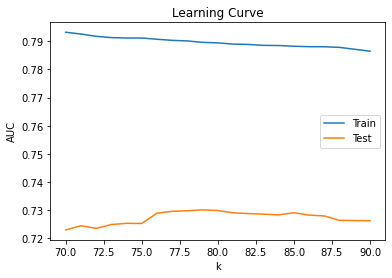

In [61]:
# Analyzing Learning Curve
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from matplotlib import pyplot as plt

def draw_learning_curve_dt(param_values):
    train_scores = []
    test_scores = []

    for i in param_values:
        model = DecisionTreeClassifier(min_samples_leaf=i)
        model.fit(Xs_train, ys_train)

        # eval on train
        ys_pred_train_proba = model.predict_proba(Xs_train)
        train_auc = roc_auc_score(ys_train, ys_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        ys_pred_proba = model.predict_proba(Xs_test)
        test_auc = roc_auc_score(ys_test, ys_pred_proba[:,1])
        test_scores.append(test_auc)

        print('param value: ' + str(i) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('k')
    plt.ylabel('AUC')
    plt.title('Learning Curve')
    plt.legend()
    plt.show()

param_values = [int(x) for x in np.linspace(70, 90, 20)] #ubah k disini
draw_learning_curve_dt(param_values)

Niai k = 85 sudah bestfit, selanjutnya masukan nilai 83 pada parameter min_samples leaf.

In [82]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform
import numpy as np

# List of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 100] # Minimum number of samples required to split a node
min_samples_leaf = [83] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt'] # Number of features to consider at every split
criterion = ['gini','entropy']
splitter = ['best','random']

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features,
                       criterion=criterion,
                       splitter=splitter
                      )

# Inisialisasi Model
dts = DecisionTreeClassifier(random_state=42)
model = RandomizedSearchCV(dts, hyperparameters, cv=5, scoring='roc_auc', random_state = 42)
model.fit(Xs_train, ys_train)

# Predict & Evaluation
ys_pred = model.predict(Xs_test)#Check performa dari model
eval_classification_std(model)

Accuracy (Train Set): 0.68
Accuracy (Test Set): 0.65
Precision (Train Set): 0.78
Precision (Test Set): 0.74
Recall (Train Set): 0.65
Recall (Test Set): 0.62
F1-Score (Train Set): 0.71
F1-Score (Test Set): 0.68
roc_auc (train-proba): 0.76
roc_auc (test-proba): 0.72
roc_auc (crossval train): 0.7652969307785195
roc_auc (crossval test): 0.7022248520829373


Model sudah bestfit

In [83]:
show_best_hyperparameter(model)

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 79, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 83, 'min_samples_split': 100, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'best'}



### Fit Modelling (Data Normalization)

In [63]:
# decision tree
from sklearn.tree import DecisionTreeClassifier # import decision tree dari sklearn
dt = DecisionTreeClassifier() # inisiasi object dengan nama dt
dt.fit(Xn_train, yn_train) # fit model decision tree dari data train
eval_classification_norm(dt)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.64
Precision (Train Set): 1.00
Precision (Test Set): 0.69
Recall (Train Set): 1.00
Recall (Test Set): 0.70
F1-Score (Train Set): 1.00
F1-Score (Test Set): 0.70
roc_auc (train-proba): 1.00
roc_auc (test-proba): 0.63
roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.6081290795038696


Dataset normalisasi memiliki nilai evaluasi yang hampir sama dengan dataset standarisasi, penulis menyimpulkan tidak ada pengaruh signifikan modeling dengan nilai standarisasi atau normalisasi.

## D. Random Forest

### Fit Modelling (Data Standardization)

In [101]:
from sklearn.ensemble import RandomForestClassifier

rfs = RandomForestClassifier(random_state=42)
rfs.fit(Xs_train, ys_train)
eval_classification_std(rfs)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.65
Precision (Train Set): 1.00
Precision (Test Set): 0.73
Recall (Train Set): 1.00
Recall (Test Set): 0.63
F1-Score (Train Set): 1.00
F1-Score (Test Set): 0.68
roc_auc (train-proba): 1.00
roc_auc (test-proba): 0.72
roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.7206231473758058


Model terlalu overfitting, lakukan hyperparameter tuning.

### Cek feature Importance

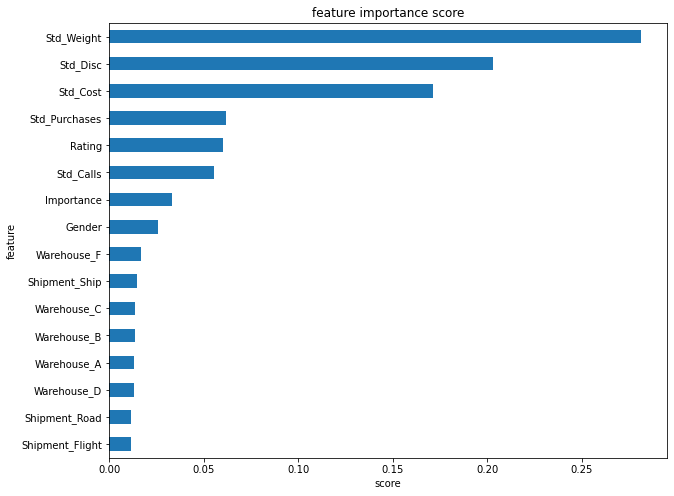

In [102]:
show_feature_importance_std(rfs)

Fitur Weight, Discount dan Cost punya nilai terbesar mempengaruhi target pada algoritma Random Forest.

In [109]:
# tuning hyperparameter RF
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(1, 200, 50)]
criterion = ['gini', 'entropy']
max_depth = [int(x) for x in np.linspace(2, 100, 50)]
min_samples_split = [int(x) for x in np.linspace(2, 20, 10)]
min_samples_leaf = [int(x) for x in np.linspace(2, 20, 10)]

hyperparameters = dict(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth,
                       min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

rfs = RandomForestClassifier(random_state=42)
rss = RandomizedSearchCV(rfs, hyperparameters, scoring='roc_auc', random_state=1, cv=5)
rss.fit(Xs_train, ys_train)
eval_classification_std(rss)

Accuracy (Train Set): 0.85
Accuracy (Test Set): 0.66
Precision (Train Set): 0.94
Precision (Test Set): 0.77
Recall (Train Set): 0.79
Recall (Test Set): 0.61
F1-Score (Train Set): 0.86
F1-Score (Test Set): 0.68
roc_auc (train-proba): 0.94
roc_auc (test-proba): 0.73
roc_auc (crossval train): 0.8932759063080116
roc_auc (crossval test): 0.717083457426584


Model masih terlalu overfitting, cek learning curve!

param value: 1; train: 0.8660669796052676; test: 0.6344146091733147
param value: 1; train: 0.8555619352051448; test: 0.6138898189664654
param value: 1; train: 0.853752129347955; test: 0.6133099358165595
param value: 2; train: 0.9450210006125956; test: 0.669471861513875
param value: 2; train: 0.9472519379584674; test: 0.6670041230743351
param value: 3; train: 0.9731646195826141; test: 0.683288163913637
param value: 3; train: 0.9720473601308461; test: 0.6796950316064624
param value: 4; train: 0.9861902598047005; test: 0.7078848741888106
param value: 4; train: 0.9854365657637411; test: 0.6917862422924875
param value: 5; train: 0.9917643946906392; test: 0.705804331088207


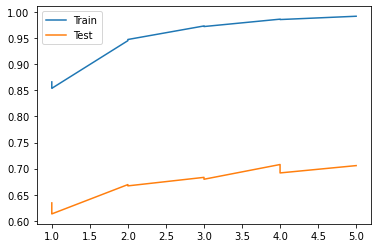

In [110]:
#learning curve
param_values = [int(x) for x in np.linspace(1, 5, 10)] # n_estimators
# param_values = [int(x) for x in np.linspace(2, 100, 50)] # max_depth
# param_values = [int(x) for x in np.linspace(2, 20, 15)] # min_samples_split
# param_values = [int(x) for x in np.linspace(2, 20, 15)] # min_samples_leaf

train_scores = []
test_scores = []

for c in param_values:
    model = RandomForestClassifier(n_estimators=c) #cek param n estimator
    model.fit(Xs_train, ys_train)

    # eval on train
    ys_pred_train_proba = model.predict_proba(Xs_train)
    train_auc = roc_auc_score(ys_train, ys_pred_train_proba[:,1])
    train_scores.append(train_auc)

    # eval on test
    ys_pred_proba = model.predict_proba(Xs_test)
    test_auc = roc_auc_score(ys_test, ys_pred_proba[:,1])
    test_scores.append(test_auc)

    print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.legend()
plt.show()

c = 2 paling bestfit, masukan nilai c= 2 pada parameter n_estimators. selanjutnya coba tuning pada parameter max_depth

param value: 1; train: 0.5510615587685113; test: 0.5428163234276028
param value: 1; train: 0.6758932815201324; test: 0.6870448685598193
param value: 1; train: 0.5189772190547821; test: 0.5178722493966628
param value: 2; train: 0.7252405799437248; test: 0.7297651513681037
param value: 2; train: 0.7253676133171268; test: 0.7342588413983191
param value: 3; train: 0.7352302904270186; test: 0.7406794095382288
param value: 3; train: 0.7412121259603984; test: 0.741025155767775
param value: 4; train: 0.7446496751601815; test: 0.7361060563416733
param value: 4; train: 0.7325809077607132; test: 0.7192690237258745
param value: 5; train: 0.7513309217511729; test: 0.7297900208337378


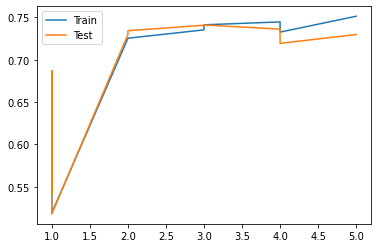

In [111]:
#learning curve
# param_values = [int(x) for x in np.linspace(1, 5, 10)] # n_estimators
param_values = [int(x) for x in np.linspace(1, 5, 10)] # max_depth
# param_values = [int(x) for x in np.linspace(2, 20, 15)] # min_samples_split
# param_values = [int(x) for x in np.linspace(2, 20, 15)] # min_samples_leaf

train_scores = []
test_scores = []

for c in param_values:
    model = RandomForestClassifier(n_estimators= 2, max_depth = c) # c = 2 dan tuning max_depth 
    model.fit(Xs_train, ys_train)

    # eval on train
    ys_pred_train_proba = model.predict_proba(Xs_train)
    train_auc = roc_auc_score(ys_train, ys_pred_train_proba[:,1])
    train_scores.append(train_auc)

    # eval on test
    ys_pred_proba = model.predict_proba(Xs_test)
    test_auc = roc_auc_score(ys_test, ys_pred_proba[:,1])
    test_scores.append(test_auc)

    print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.legend()
plt.show()

Pada max depth = 5 model sudah bestfit

In [112]:
# tuning hyperparameter RF
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [2]
criterion = ['gini', 'entropy']
max_depth = [5]
min_samples_split = [int(x) for x in np.linspace(2, 20, 10)]
min_samples_leaf = [int(x) for x in np.linspace(2, 20, 10)]

hyperparameters = dict(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth,
                       min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

rfs = RandomForestClassifier(random_state=42)
rss = RandomizedSearchCV(rfs, hyperparameters, scoring='roc_auc', random_state=1, cv=5)
rss.fit(Xs_train, ys_train)
eval_classification_std(rss)

Accuracy (Train Set): 0.67
Accuracy (Test Set): 0.65
Precision (Train Set): 0.75
Precision (Test Set): 0.73
Recall (Train Set): 0.67
Recall (Test Set): 0.64
F1-Score (Train Set): 0.71
F1-Score (Test Set): 0.68
roc_auc (train-proba): 0.75
roc_auc (test-proba): 0.73
roc_auc (crossval train): 0.7530222529629895
roc_auc (crossval test): 0.7129944375135076


In [113]:
show_best_hyperparameter(rss)

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 6, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 2, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


### Fit Modelling (Data Normalization)

In [71]:
from sklearn.ensemble import RandomForestClassifier

rfs = RandomForestClassifier(random_state=42)
rfs.fit(Xn_train, yn_train)
eval_classification_norm(rfs)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.65
Precision (Train Set): 1.00
Precision (Test Set): 0.73
Recall (Train Set): 1.00
Recall (Test Set): 0.63
F1-Score (Train Set): 1.00
F1-Score (Test Set): 0.68
roc_auc (train-proba): 1.00
roc_auc (test-proba): 0.72
roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.7209114987885756


Dataset normalisasi memiliki nilai evaluasi yang hampir sama dengan dataset standarisasi, penulis menyimpulkan tidak ada pengaruh signifikan modeling dengan nilai standarisasi atau normalisasi.

## 5. Adaboost

### Fit Modelling (Data Standardization)

In [22]:
from sklearn.ensemble import AdaBoostClassifier
clfs = AdaBoostClassifier()
clfs.fit(Xs_train, ys_train)
eval_classification_std(clfs)

Accuracy (Train Set): 0.68
Accuracy (Test Set): 0.66
Precision (Train Set): 0.80
Precision (Test Set): 0.78
Recall (Train Set): 0.61
Recall (Test Set): 0.59
F1-Score (Train Set): 0.69
F1-Score (Test Set): 0.67
roc_auc (train-proba): 0.76
roc_auc (test-proba): 0.74
roc_auc (crossval train): 0.7589001182826435
roc_auc (crossval test): 0.7119999926723677


Model sudah cukup bestfit, coba lakukan tuning hyperparameter.

In [117]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# List of hyperparameter
hyperparameters = dict(n_estimators = [int(x) for x in np.linspace(start = 50, stop = 2000, num = 2000)], # Jumlah iterasi
                       learning_rate = [float(x) for x in np.linspace(start = 0.001, stop = 0.1, num = 200)],  
                       algorithm = ['SAMME', 'SAMME.R']
                      )

# Init model
abs = AdaBoostClassifier(random_state=42)
abs_tuned = RandomizedSearchCV(abs, hyperparameters, random_state=42, cv=5, scoring='roc_auc')
abs_tuned.fit(Xs_train,ys_train)

# Predict & Evaluation
eval_classification_std(abs_tuned)

Accuracy (Train Set): 0.67
Accuracy (Test Set): 0.67
Precision (Train Set): 0.77
Precision (Test Set): 0.76
Recall (Train Set): 0.63
Recall (Test Set): 0.63
F1-Score (Train Set): 0.69
F1-Score (Test Set): 0.69
roc_auc (train-proba): 0.75
roc_auc (test-proba): 0.74
roc_auc (crossval train): 0.7581563215328401
roc_auc (crossval test): 0.71201036430838


Model sebelum tuning hyperparameter ternyata lebih baik karena nilai ROC-AUC lebih tinggi yaitu 0.76 dibanding 0.75 dengan gap ROC-AUC tidak terlalu jauh hanya berbededa 1%. Oleh karena itu ambil modeling sebelum tuning hyperparameter.

In [118]:
show_best_hyperparameter(abs_tuned)

{'algorithm': 'SAMME.R', 'base_estimator': None, 'learning_rate': 0.08358291457286432, 'n_estimators': 225, 'random_state': 42}


### Feature Imporrance Adaboost

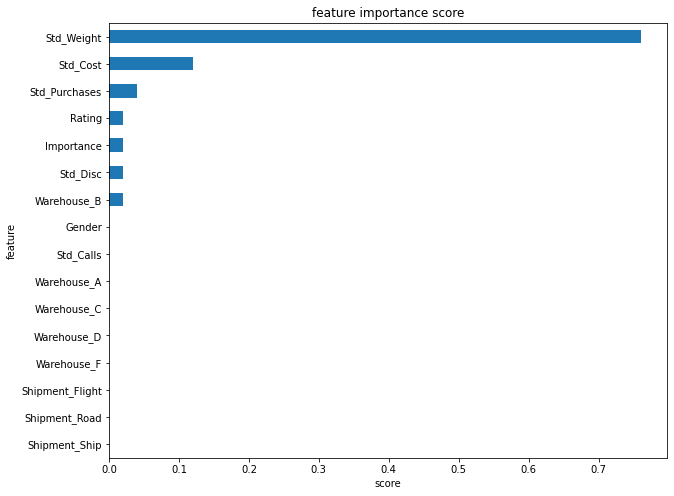

In [23]:
show_feature_importance_std(clfs)

Dari bar chart feature importance pada Adaboost di atas, terlihat feature Weight punya nilai pengaruh terbesar terhadap target, disusul feature Cost, Purchases, Rating, Product Importance dan Discount.

### Confusion Matrix

In [160]:
from sklearn.metrics import confusion_matrix # import package dari sklearn
confusion_matrix(ys_test, ys_pred) # lihat hasil confusion matrix-nya

array([[ 958,  363],
       [ 697, 1175]], dtype=int64)

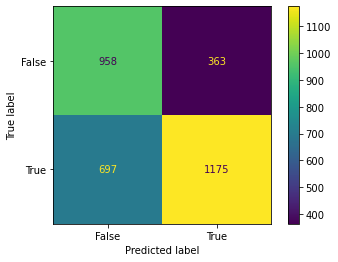

In [161]:
from sklearn import metrics

# perdiksi target
ys_pred = abs_tuned.predict(Xs_test)

# buat confusion matrix
confusion_matrix = metrics.confusion_matrix(ys_test, ys_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

### Fit Modelling (Data Normalization)

In [119]:
from sklearn.ensemble import AdaBoostClassifier
clfn = AdaBoostClassifier()
clfn.fit(Xn_train, yn_train)
eval_classification_norm(clfn)

Accuracy (Train Set): 0.68
Accuracy (Test Set): 0.66
Precision (Train Set): 0.80
Precision (Test Set): 0.78
Recall (Train Set): 0.61
Recall (Test Set): 0.59
F1-Score (Train Set): 0.69
F1-Score (Test Set): 0.67
roc_auc (train-proba): 0.76
roc_auc (test-proba): 0.74
roc_auc (crossval train): 0.7589001182826435
roc_auc (crossval test): 0.7119999926723677


Dataset normalisasi memiliki nilai evaluasi yang hampir sama dengan dataset standarisasi, penulis menyimpulkan tidak ada pengaruh signifikan modeling dengan nilai standarisasi atau normalisasi.

## F. XGBoost

### Fit Modelling (Data Standardization)

In [18]:
from xgboost import XGBClassifier

xgs = XGBClassifier()
xgs.fit(Xs_train, ys_train)
eval_classification_std(xgs)

Accuracy (Train Set): 0.92
Accuracy (Test Set): 0.64
Precision (Train Set): 0.97
Precision (Test Set): 0.71
Recall (Train Set): 0.89
Recall (Test Set): 0.64
F1-Score (Train Set): 0.93
F1-Score (Test Set): 0.67
roc_auc (train-proba): 0.98
roc_auc (test-proba): 0.71
roc_auc (crossval train): 0.9755223208774412
roc_auc (crossval test): 0.7221942559637166


Model masih sangat overfit, coba lakukan tuning hyperparameter

In [19]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

#Menjadikan ke dalam bentuk dictionary
hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }

# Init
from xgboost import XGBClassifier
xgs = XGBClassifier(random_state=42)
xgs_tuned = RandomizedSearchCV(xgs, hyperparameters, cv=5, random_state=42, scoring='recall')
xgs_tuned.fit(Xs_train,ys_train)

# Predict & Evaluation
eval_classification_std(xgs_tuned)

Accuracy (Train Set): 0.69
Accuracy (Test Set): 0.64
Precision (Train Set): 0.73
Precision (Test Set): 0.69
Recall (Train Set): 0.74
Recall (Test Set): 0.71
F1-Score (Train Set): 0.74
F1-Score (Test Set): 0.70
roc_auc (train-proba): 0.78
roc_auc (test-proba): 0.73
roc_auc (crossval train): 0.8928550440988616
roc_auc (crossval test): 0.7229920816448401


Model sudah lumayan best-fit dengan selisih ROC-AUC pada data train dan test sebesar 5%.

In [20]:
show_best_hyperparameter(xgs_tuned)

{'objective': 'binary:logistic', 'use_label_encoder': None, 'base_score': 0.5, 'booster': 'gbtree', 'callbacks': None, 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 0.1, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': 0.4, 'gpu_id': -1, 'grow_policy': 'depthwise', 'importance_type': None, 'interaction_constraints': '', 'learning_rate': 0.13131313, 'max_bin': 256, 'max_cat_threshold': 64, 'max_cat_to_onehot': 4, 'max_delta_step': 0, 'max_depth': 90, 'max_leaves': 0, 'min_child_weight': 6, 'missing': nan, 'monotone_constraints': '()', 'n_estimators': 100, 'n_jobs': 0, 'num_parallel_tree': 1, 'predictor': 'auto', 'random_state': 42, 'reg_alpha': 0.300000012, 'reg_lambda': 0, 'sampling_method': 'uniform', 'scale_pos_weight': 1, 'subsample': 1, 'tree_method': 'hist', 'validate_parameters': 1, 'verbosity': None, 'lambda': 0.0, 'eta': 0.13131313131313133, 'alpha': 0.30000000000000004}


### Fit Modelling (Data Normalization)

In [21]:
from xgboost import XGBClassifier

xgn = XGBClassifier()
xgn.fit(Xn_train, yn_train)
eval_classification_norm(xgn)

Accuracy (Train Set): 0.92
Accuracy (Test Set): 0.64
Precision (Train Set): 0.97
Precision (Test Set): 0.71
Recall (Train Set): 0.89
Recall (Test Set): 0.64
F1-Score (Train Set): 0.93
F1-Score (Test Set): 0.67
roc_auc (train-proba): 0.98
roc_auc (test-proba): 0.71
roc_auc (crossval train): 0.9755223208774412
roc_auc (crossval test): 0.7227071909548684


Dataset normalisasi memiliki nilai evaluasi yang hampir sama dengan dataset standarisasi, penulis menyimpulkan tidak ada pengaruh signifikan modeling dengan nilai standarisasi atau normalisasi.

# 3. SHAP Values Feature Importances

In [104]:
!pip install shap

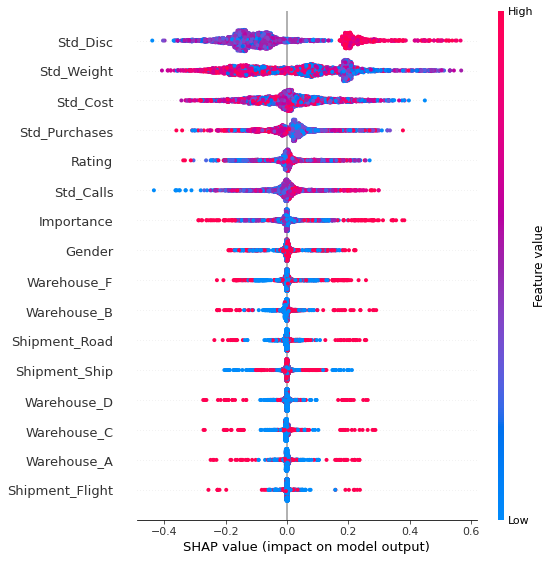

In [106]:
from sklearn.tree import DecisionTreeClassifier
dtsh = DecisionTreeClassifier()
dtsh.fit(Xs_train, ys_train)

import shap
explainer = shap.TreeExplainer(dtsh)
shap_values = explainer.shap_values(Xs_test)
shap.summary_plot(shap_values[1], Xs_test) # Summary shap value terhadap label positive

Interpretasi : <br>
1. Feature Discount dan Weight memiliki importance terbesar dibanding feature-feature yang lain.
2. Feature Discount berkolerasi secara positif, artinya makin banyak diskon diberikan makin tinggi peluang terjadinya pengiriman terlambat.
3. Feature Weight berkolerasi secara negatif, artinya pada barang-barang yang beratnya rendah punya peluang terjadinya pengiriman terlambat yang makin tinggi.